# **STAT 640 : Homework 2**
## Pavan Malapati
## tq8817


Install the Python Pacakages and import necessary libraries

In [2]:
import numpy as np
from scipy.stats import binom, hypergeom, gamma, chi2
import matplotlib.pyplot as plt

## Exercise 2.10

In [3]:
P_150 = np.exp(-150 / 200)
P_280 = np.exp(-280 / 200)

# Compute the probability of the event B = {150 < T < 280}
P_B = P_150 - P_280

print(f"The probability of the event B (150 < T < 280) is: {P_B:.4f}")

The probability of the event B (150 < T < 280) is: 0.2258


## Exercise 2.13

In [4]:
n = 10   # sample size
M = 900  # number of good items
N = 1000 # total number of items
p = M / N  # probability of selecting a good item

# (i) Sampling with replacement (Binomial distribution)
# P(X >= 8) = P(X = 8) + P(X = 9) + P(X = 10)
P_r = binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

# (ii) Sampling without replacement (Hypergeometric distribution)
# P(X >= 8) = P(X = 8) + P(X = 9) + P(X = 10)
P_nr = hypergeom.pmf(8, N, M, n) + hypergeom.pmf(9, N, M, n) + hypergeom.pmf(10, N, M, n)

print(f"Probability with replacement: {P_r:.4f}")
print(f"Probability without replacement: {P_nr:.4f}")

Probability with replacement: 0.9298
Probability without replacement: 0.9308


## Exercise 2.14

In [5]:
# Let p_10 be the probability of all items good
p_10 = p ** n
print(f"Probability of all 10 items being good is: {p_10:.4f}")

# Let pa_1 be the probability of atleast one defective item
pa_1 = 1 - p ** n
print(f"Probability of at least one defective item: {pa_1:.4f}")

Probability of all 10 items being good is: 0.3487
Probability of at least one defective item: 0.6513


## Exercise 1 :
Using Python verify that these models are the same: GAMMA( alpha = n/2,1/2) = CHISQ( n). To show this compute the cumulative probabilities for the two models using the same value of x and parameter n.

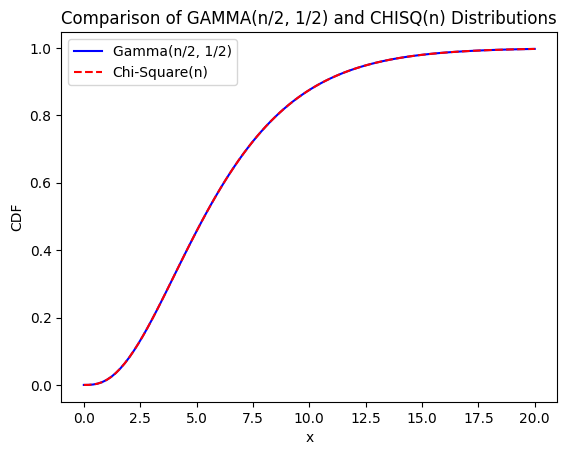

In [9]:
n = 6  #n -> Degrees of Freedom
a = n / 2  #a -> alpha
b = 0.5  #b -> beta

# Generate a range of x values
x_v = np.linspace(0, 20, 100)

# Compute the CDF values for the Gamma(alpha = n/2, beta = 1/2) distribution
g_cdf = gamma.cdf(x_v, a=a, scale=1/b)

# Compute the CDF values for the Chi-Square(n) distribution
c_cdf = chi2.cdf(x_v, df=n)

# Plot the CDFs for both distributions
plt.plot(x_v, g_cdf, label='Gamma(n/2, 1/2)', color='blue')
plt.plot(x_v, c_cdf, label='Chi-Square(n)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title(f'Comparison of GAMMA(n/2, 1/2) and CHISQ(n) Distributions')
plt.legend()

From the graph, we can observe that the CDF values of both the distributions (GAMMA(n/2, 1/2) and CHISQ(n)) are equal.

### Monte Carlo Simulation

In [11]:
g_s = gamma.rvs(a=a, scale=1/b, size=100000)
c_s = chi2.rvs(df=n, size=100000)
m_d = np.abs(np.mean(g_s) - np.mean(c_s))
v_d = np.abs(np.var(g_s) - np.var(c_s))

print(f"Difference in means: {m_d:.5f}")
print(f"Difference in variances: {v_d:.5f}")

Difference in means: 0.03374
Difference in variances: 0.16010


This Monte Carlo simulation generates 100,000 random samples from both the Gamma and Chi-Square distributions, then compares their means and variances. The small differences in the output—0.03374 for the means and 0.16010 for the variances—show that the two distributions are nearly identical, confirming that Gamma(\(n/2\), 1/2) and Chi-Square(\(n\)) behave very similarly for large sample sizes.